# Project 8 - Artificial Neural Networks

Κωνσταντίνα Μαρίνα Μπλέτσα, ΑΕΜ: 243

#Ερώτημα 1

#Βιβλιοθήκες

In [1]:
import os
import PIL
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam

#Ερώτημα 2

#Αποσυμπίεση δεδομένων

In [2]:
!unzip archive.zip

Archive:  archive.zip
  inflating: dataset/Beagle/Beagle_1.jpg  
  inflating: dataset/Beagle/Beagle_10.jpg  
  inflating: dataset/Beagle/Beagle_100.jpg  
  inflating: dataset/Beagle/Beagle_11.jpg  
  inflating: dataset/Beagle/Beagle_12.jpg  
  inflating: dataset/Beagle/Beagle_13.jpg  
  inflating: dataset/Beagle/Beagle_14.jpg  
  inflating: dataset/Beagle/Beagle_15.jpg  
  inflating: dataset/Beagle/Beagle_16.jpg  
  inflating: dataset/Beagle/Beagle_17.jpg  
  inflating: dataset/Beagle/Beagle_18.jpg  
  inflating: dataset/Beagle/Beagle_19.jpg  
  inflating: dataset/Beagle/Beagle_2.jpg  
  inflating: dataset/Beagle/Beagle_20.jpg  
  inflating: dataset/Beagle/Beagle_21.jpg  
  inflating: dataset/Beagle/Beagle_22.jpg  
  inflating: dataset/Beagle/Beagle_23.jpg  
  inflating: dataset/Beagle/Beagle_24.jpg  
  inflating: dataset/Beagle/Beagle_25.jpg  
  inflating: dataset/Beagle/Beagle_26.jpg  
  inflating: dataset/Beagle/Beagle_27.jpg  
  inflating: dataset/Beagle/Beagle_28.jpg  
  inflating

#Ερώτημα 3

#Δημιουργία των labels

In [3]:
DATASET_DIR = "dataset"
class_names = sorted(os.listdir(DATASET_DIR))
class_to_label = {class_name: idx for idx, class_name in enumerate(class_names)}

print("Αντιστοίχιση κλάσεων σε labels:")
print(class_to_label)


Αντιστοίχιση κλάσεων σε labels:
{'Beagle': 0, 'Boxer': 1, 'Bulldog': 2, 'Dachshund': 3, 'German_Shepherd': 4, 'Golden_Retriever': 5, 'Labrador_Retriever': 6, 'Poodle': 7, 'Rottweiler': 8, 'Yorkshire_Terrier': 9}


#Φόρτωση των εικόνων σε numpy arrays: RGB, 64×64

In [4]:
image_size = (64, 64)

inputs = []
targets = []
for label in class_names:
    for filename in os.listdir(f'dataset/{label}'):
        filepath = f'dataset/{label}/{filename}'
        img = PIL.Image.open(filepath).convert('RGB').resize(image_size)
        inputs.append(img)
        targets.append(class_to_label[label])
inputs = np.float32(inputs)
targets = np.int32(targets)

print("inputs shape:", inputs.shape)
print("targets shape:", targets.shape)

inputs shape: (967, 64, 64, 3)
targets shape: (967,)


#Ερώτημα 4

In [5]:
seed = 0

tf.random.set_seed(seed=seed)
np.random.seed(seed=seed)
random.seed(seed)

test_size = 0.3
stratify = [targets.shape]

x_train, x_test, y_train, y_test = train_test_split(
    inputs,
    targets,
    test_size=0.3,
    stratify=targets,
    random_state=seed
)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((676, 64, 64, 3), (676,), (291, 64, 64, 3), (291,))

In [6]:
x_train /= 255.0
x_test /= 255.0
y_train = np.eye(len(class_names))[y_train]
y_test = np.eye(len(class_names))[y_test]

y_train.shape, y_test.shape

((676, 10), (291, 10))

#Δημιουργία του MLP

1. Επίπεδο Εισόδου (Input Layer)

Πλήθος εισόδων: 64 × 64 × 3 = 12.288

Πλήθος εξόδων: 64 × 64 × 3

Δεν υπάρχει συνάρτηση ενεργοποίησης

Σε αυτό το επίπεδο ορίζεται το σχήμα των δεδομένων εισόδου δηλαδή εικόνες RGB μεγέθους 64×64

2. Επίπεδο Flatten

Πλήθος εισόδων: 64 × 64 × 3 = 12.288

Πλήθος εξόδων: 12.288

Δεν υπάρχει συνάρτηση ενεργοποίησης

Μετατρέπει την εικόνα από τρισδιάστατο πίνακα σε μονοδιάστατο διάνυσμα

3. Πρώτο Κρυφό Επίπεδο (Dense)

Πλήθος εισόδων: 12.288

Πλήθος εξόδων: 128

Συνάρτηση ενεργοποίησης: ReLU

Το επίπεδο αυτό εισάγει μη γραμμικότητα στο μοντέλο και εξάγει βασικά χαρακτηριστικά από τα δεδομένα

4. Δεύτερο Κρυφό Επίπεδο (Dense)

Πλήθος εισόδων: 128

Πλήθος εξόδων: 128

Συνάρτηση ενεργοποίησης: ReLU

Αυτό το επίπεδο επιτρέπει στο μοντέλο να μάθει πιο σύνθετες αναπαραστάσεις των δεδομένων.

5. Επίπεδο Εξόδου (Dense)

Πλήθος εισόδων: 128

Πλήθος εξόδων: ίσο με τον αριθμό των κατηγοριών(10 ράτσες)

Συνάρτηση ενεργοποίησης: Softmax

Αυτό το επίπεδο παράγει πιθανότητες για κάθε κατηγορία και χρησιμοποιείται για πολυκατηγορική ταξινόμηση

In [7]:
input_size = (64, 64, 3)
output_size = y_train.shape[1]

mlp = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_size),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu', use_bias=True),
    tf.keras.layers.Dense(units=128, activation='relu', use_bias=True),
    tf.keras.layers.Dense(units=output_size, activation='softmax', use_bias=True)
], name='MLP')
mlp.summary()

Model: "MLP"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,572,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,590,794 (6.07 MB)

 Trainable params: 1,590,794 (6.07 MB)

 Non-trainable params: 0 (0.00 B)

#Ερώτημα 5

#Εκπαίδευση Neural Network

Optimizer: Adam

Learning Rate: 0.001

Loss Function: Categorical Cross-Entropy

Batch Size: 32

Epochs: 30

In [8]:
mlp.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = mlp.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=30,
    validation_data=(x_test, y_test)
)

Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.1114 - loss: 3.4492 - val_accuracy: 0.2405 - val_loss: 2.3407
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.3290 - loss: 2.1139 - val_accuracy: 0.3058 - val_loss: 1.8775
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.4222 - loss: 1.7414 - val_accuracy: 0.3608 - val_loss: 1.7471
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5496 - loss: 1.5159 - val_accuracy: 0.5223 - val_loss: 1.4746
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6102 - loss: 1.2736 - val_accuracy: 0.4089 - val_loss: 1.5301
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5927 - loss: 1.2016 - val_accuracy: 0.3780 - val_loss: 1.7180
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6538 - loss: 1.1371 - val_accuracy: 0.5601 - val_loss: 1.2756
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7194 - loss: 0.9733 - val_accuracy: 0.5361 - v

#Ερώτημα 6

#loss history και accuracy history για τα δεδομένα train, test

In [13]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

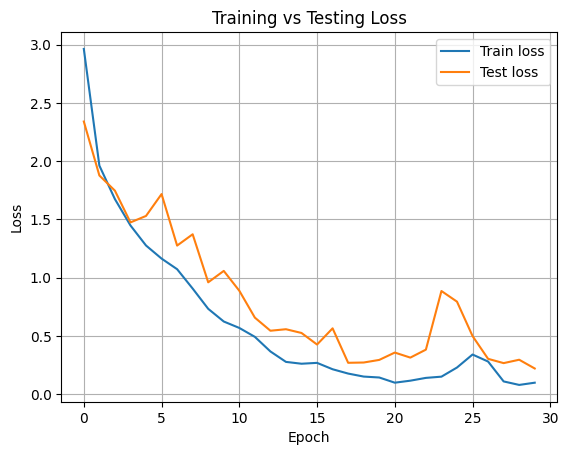

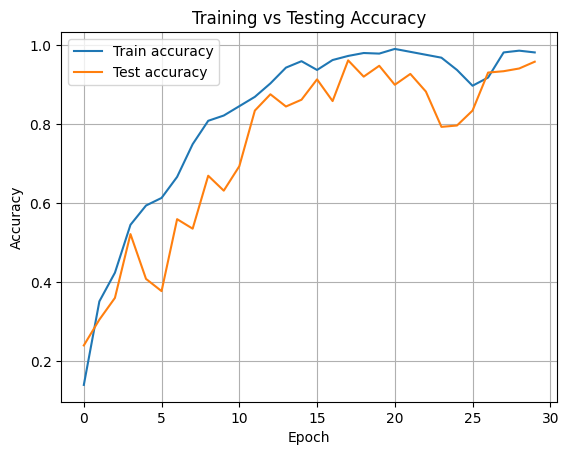

In [9]:
plt.figure()
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Testing Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy')
plt.legend()
plt.grid(True)
plt.show()

#Ερώτημα 7

#Δημιουργία Convolutional Neural Network (CNN)

In [10]:
input_size = (64, 64, 3)
output_size = y_train.shape[1]

cnn = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_size),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=2, activation='relu', use_bias=True),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, activation='relu', use_bias=True),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu', use_bias=True),
    tf.keras.layers.Dense(units=output_size, activation='softmax', use_bias=True)
], name='CNN')
cnn.summary()

Model: "CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 31, 31, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 26912)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     3,444,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,456,298 (13.18 MB)

 Trainable params: 3,456,298 (13.18 MB)

 Non-trainable params: 0 (0.00 B)

#Εκπαίδευση του CNN

In [11]:
batch_size = 32
epochs = 30

optim = tf.keras.optimizers.Adam(learning_rate=0.001)
cnn.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])

history = cnn.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 198ms/step - accuracy: 0.1252 - loss: 2.4610 - val_accuracy: 0.4055 - val_loss: 2.1832
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step - accuracy: 0.4168 - loss: 2.0070 - val_accuracy: 0.5120 - val_loss: 1.6084
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - accuracy: 0.6222 - loss: 1.2607 - val_accuracy: 0.6392 - val_loss: 1.0003
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step - accuracy: 0.8544 - loss: 0.5910 - val_accuracy: 0.8763 - val_loss: 0.3914
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 177ms/step - accuracy: 0.9515 - loss: 0.2708 - val_accuracy: 0.9759 - val_loss: 0.1758
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - accuracy: 0.9941 - loss: 0.0682 - val_accuracy: 0.9759 - val_loss: 0.1144
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step - accuracy: 0.9949 - loss: 0.0286 - val_accuracy: 0.9759 - val_loss: 0.1156
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - accuracy: 1.0000 - loss: 0.0087 - val_accuracy: 0.

#loss history και accuracy history για τα δεδομένα train, test

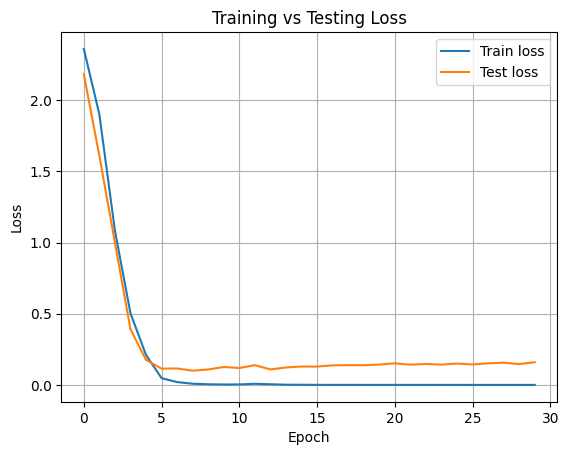

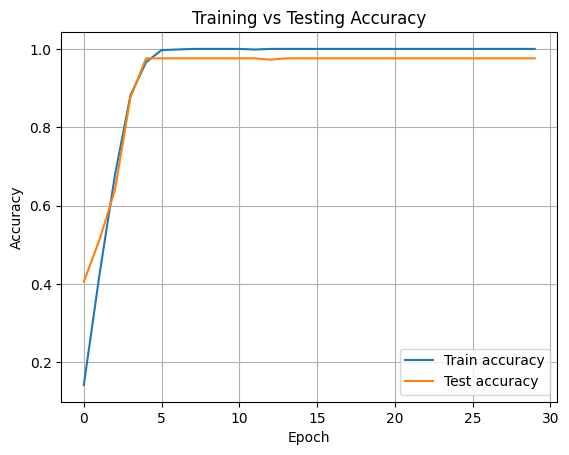

In [12]:
plt.figure()
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Testing Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy')
plt.legend()
plt.grid(True)
plt.show()

#MLP Vs CNN

Με βάση τα διαγράμματα accuracy και loss, το CNN είναι καλύτερο απο το MLP γιατι έχει υψηλότερη ακρίβεια στο test set και χαμηλότερη τιμή loss. Επιπλέον, το CNN παρουσιάζει πιο σταθερή επίδοση χωρίς μεγάλες διακυμανσεις όπως το MLP και μικρότερη απόκλιση μεταξύ training και test αποτελεσμάτων κατι που δείχνει καλύτερη γενίκευση και όχι overfitting.

#Ερώτημα 8

#Δοκιμή του CNN Batch Normalization

In [25]:
cnn_bn = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(64, 64, 3)),

    tf.keras.layers.Conv2D(32, kernel_size=3, strides=2, activation='relu'),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(32, kernel_size=3, strides=1, activation='relu'),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Dense(y_train.shape[1], activation='softmax')
], name='CNN_BatchNorm')


In [26]:
cnn_bn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_cnn_bn = cnn_bn.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    epochs=30,
    batch_size=32
)


Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 177ms/step - accuracy: 0.4934 - loss: 2.0264 - val_accuracy: 0.1649 - val_loss: 2.1153
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 157ms/step - accuracy: 0.9988 - loss: 0.0749 - val_accuracy: 0.2543 - val_loss: 2.0925
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 222ms/step - accuracy: 1.0000 - loss: 0.0209 - val_accuracy: 0.2027 - val_loss: 2.0976
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 161ms/step - accuracy: 1.0000 - loss: 0.0123 - val_accuracy: 0.2543 - val_loss: 2.0796
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 157ms/step - accuracy: 1.0000 - loss: 0.0085 - val_accuracy: 0.3265 - val_loss: 2.0465
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 226ms/step - accuracy: 1.0000 - loss: 0.0067 - val_accuracy: 0.3918 - val_loss: 2.0019
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 161ms/step - accuracy: 1.0000 - loss: 0.0056 - val_accuracy: 0.4777 - val_loss: 1.9437
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 145ms/step - accuracy: 1.0000 - loss: 0.0049 - val_accuracy: 0.

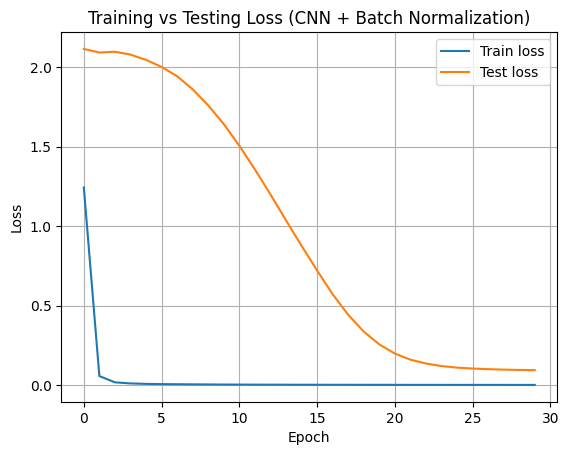

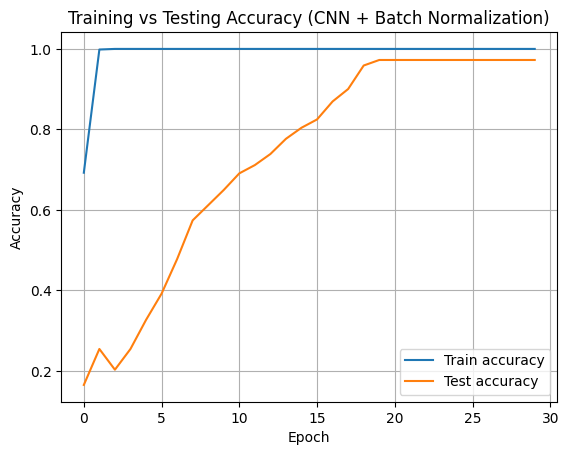

In [27]:
plt.figure()
plt.plot(history_cnn_bn.history['loss'], label='Train loss')
plt.plot(history_cnn_bn.history['val_loss'], label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Testing Loss (CNN + Batch Normalization)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(history_cnn_bn.history['accuracy'], label='Train accuracy')
plt.plot(history_cnn_bn.history['val_accuracy'], label='Test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy (CNN + Batch Normalization)')
plt.legend()
plt.grid(True)
plt.show()


Δοκίμασα το CNN με Batch Normalization αλλά δεν βελτιώθηκε απο το απλο CNN που έκανα πριν πιθανώς γιατί το μοντέλο χρειάζεται περισσότερα epochs και απο οτι βρήκα το Batch Normalization βοηθά κυρίως σε βαθύτερα δίκτυα με πιο πολλά Conv layers.

#Δοκιμή του Standard Scaling CNN

In [23]:
mean = x_train.mean()
std = x_train.std()

x_train_scaled = (x_train - mean) / std
x_test_scaled  = (x_test - mean) / std

cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_cnn_scaled = cnn.fit(
    x_train_scaled,
    y_train,
    validation_data=(x_test_scaled, y_test),
    epochs=30,
    batch_size=32
)


Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - accuracy: 0.9328 - loss: 0.5431 - val_accuracy: 0.9759 - val_loss: 0.1999
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 134ms/step - accuracy: 0.9977 - loss: 0.0117 - val_accuracy: 0.9725 - val_loss: 0.1659
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 205ms/step - accuracy: 0.9991 - loss: 0.0018 - val_accuracy: 0.9759 - val_loss: 0.1959
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step - accuracy: 1.0000 - loss: 4.2253e-04 - val_accuracy: 0.9759 - val_loss: 0.1724
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 1.0000 - loss: 1.4448e-04 - val_accuracy: 0.9759 - val_loss: 0.1760
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 182ms/step - accuracy: 1.0000 - loss: 1.0310e-04 - val_accuracy: 0.9759 - val_loss: 0.1820
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 151ms/step - accuracy: 1.0000 - loss: 7.1425e-05 - val_accuracy: 0.9759 - val_loss: 0.1843
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - accuracy: 1.0000 - loss: 5.1354e-0

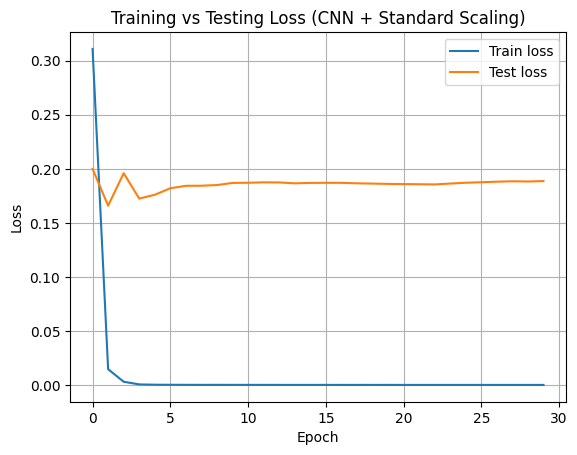

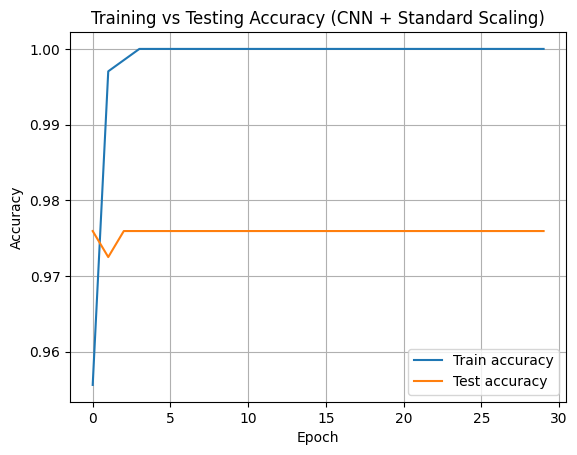

In [24]:
plt.figure()
plt.plot(history_cnn_scaled.history['loss'], label='Train loss')
plt.plot(history_cnn_scaled.history['val_loss'], label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Testing Loss (CNN + Standard Scaling)')
plt.legend()
plt.grid(True)
plt.show()


plt.figure()
plt.plot(history_cnn_scaled.history['accuracy'], label='Train accuracy')
plt.plot(history_cnn_scaled.history['val_accuracy'], label='Test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy (CNN + Standard Scaling)')
plt.legend()
plt.grid(True)
plt.show()


Παρότι εφάρμοσα Standard Scaling, η απόδοση του CNN δεν παρουσίασε βελτίωση σε σχέση με το αρχικό μοντέλο ίσως οφείλετε στο γεγονός οτι το CNN ήταν ήδη επαρκώς προσαρμοσμένο στα δεδομένα.